<a href="https://colab.research.google.com/github/nileshmalode11/petents_classification_and_sentance-similarity-project/blob/main/sentance_similarity_by_PATENTSBERTa_using_sentance_embending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install sentence_transformers pandas torch
! pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=90e73df8047d3bcd57e3b5809f4124fdfda4624f2fe082b94ac61b3e858be647
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
#Install necessary packages
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
from torch.utils.data import DataLoader
import numpy as np


In [ ]:
# Load your dataset
patent_dataset = pd.read_csv("/content/drive/MyDrive/patents_data000000000000.csv",encoding="unicode_escape",on_bad_lines="skip")

In [ ]:
#Delete unwanted column
patent_dataset = patent_dataset.drop(["date"],axis=1)
patents_data=patent_dataset

In [ ]:
#Code to convert cpc_id labels into columns in the dataset.
patents_data = pd.concat([patent_dataset.drop('cpc_ids', axis=1), patent_dataset['cpc_ids'].str.get_dummies(sep=",")], axis=1)
patents_data

In [ ]:
model = SentenceTransformer("AI-Growth-Lab/PatentSBERTa")

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/440 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
# Extract the 'text' column from dataset
texts = patents_data['text'].tolist()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Encode the texts to obtain sentence embeddings
sentence_embeddings = model.encode(texts)

In [ ]:

sentence_embeddings = np.load("/content/drive/MyDrive/checkpoints/embeddings.npy")

In [ ]:
# take example for finding similar sentences
query_text = "A data processing system for modifying a query during compilation of the query, the query comprising a request for an element of data from a table in a database and parameters identifying the requested element, the data processing system comprising: a computer executing data processing, the computer comprising: an external system interface which: wherein based on determining that the external system does not know the requested data classification and the query associated classification, the suggested action comprises a request to call the external system again at execution time of the query for the requested data classification and the query associated classification, and wherein the external system is external to the computer and manages assignment of classifications to users and sections of data in the table."

# Encode the example text
query_embedding = model.encode(query_text)

In [ ]:
# Use cosine similarity to find the most similar sentences
cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

In [ ]:
# Create a DataFrame with 'id', 'text', and 'similarity_score' columns
result_df = pd.DataFrame({
    'id': patents_data['id'],
    'text': texts,
    'cpc_ids': patents_data['cpc_ids'],
    'similarity_score': cosine_scores.tolist()
})

# Sort the DataFrame by similarity scores in descending order
result_df= result_df.sort_values(by='similarity_score', ascending=False)

#gives 1 as output if example mathes 90% with dataset sentances otherwise 0
result_df['prediction'] = (result_df['similarity_score'] > 0.9).astype(int)

In [ ]:
# Print the top 10 similar sentences from dataset wich is similar to example
top_n = 10
for i in range(top_n):
    print(f"Similarity Score: {result_df['similarity_score'].iloc[i]:.4f}")
    print(f"ID: {result_df['id'].iloc[i]}, Text: {result_df['text'].iloc[i]},\n cpc_ids: {result_df['cpc_ids'].iloc[i]}\n")
    print("Prediction:", result_df['prediction'].iloc[i])

Similarity Score: 0.9880
ID: 8577906, Text: 1. A data processing system for modifying a query during compilation of the query, the query comprising a request for an element of data from a table in a database and parameters identifying the requested element, the data processing system comprising: a computer executing data processing, the computer comprising: an external system interface which: wherein based on determining that the external system does not know the requested data classification and the query associated classification, the suggested action comprises a request to call the external system again at execution time of the query for the requested data classification and the query associated classification, and wherein the external system is external to the computer and manages assignment of classifications to users and sections of data in the table.,
 cpc_ids: G06F

Prediction: 1
Similarity Score: 0.8224
ID: 8416666, Text: 1. A data processing system, the data processing system

In [ ]:
#This line selects the top 10 records with the highest similarity scores from the DataFrame df_claim_cpc_result.
result_df = result_df.nlargest(10, ['similarity_score'])

In [ ]:
result_df

,id,text,cpc_ids,similarity_score,prediction
500,8577906,1. A data processing system for modifying a qu...,G06F,0.987955,1
34373,8416666,"1. A data processing system, the data processi...",G11B,0.822428,0
14871,8402348,"1. A data processing system, the system compri...","G06F,H03M",0.804161,0
13729,8525707,"1. A data processing system, the data processi...",H03M,0.801636,0
39005,8522120,"1. A data processing system, the system compri...",H03M,0.785829,0
32257,8498073,"1. A data processing system, the system compri...",G11B,0.784013,0
1825,8578253,"1. A data processing circuit, the system compr...","G11B,H03M",0.758183,0
40252,8570556,1. An image processing system to perform image...,H04N,0.754805,0
986,8402001,1. A system comprising: a query processor for ...,G06F,0.750503,0
36375,8346815,1. A system comprising: a data processing appa...,G06F,0.748408,0


## **Sentance Similarity**
Above notebook give us similar texts that are matched in our dataset with there similarity score by using Patentsberta sentance transformer.
we use sentance embending to convert text into vector and then use that vector for finding sentance similarity.

If we pass any text to the model it gives mathes from dataset


## **visualisation of results**

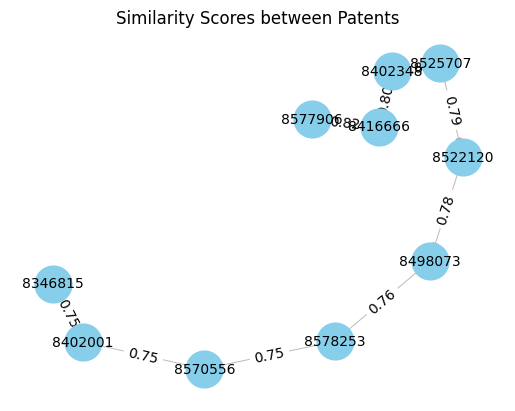

In [ ]:
#networkx library for Force directed layout.
import networkx as nx
import matplotlib.pyplot as plt


# Create a directed graph
G = nx.DiGraph()

# Adding nodes and edges based on similarity scores
for i in range(len(result_df)):
    patent_id = result_df.iloc[i]['id']
    cpc_id = result_df.iloc[i]['cpc_ids']
    similarity_score = result_df.iloc[i]['similarity_score']
    #plot to show final visuals
    G.add_node(patent_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # Connect nodes with directed edges based on similarity score
    if i > 0:
        previous_patent_id = result_df.iloc[i - 1]['id']
        G.add_edge(previous_patent_id, patent_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Similarity Scores between Patents")
plt.axis("off")
plt.show()

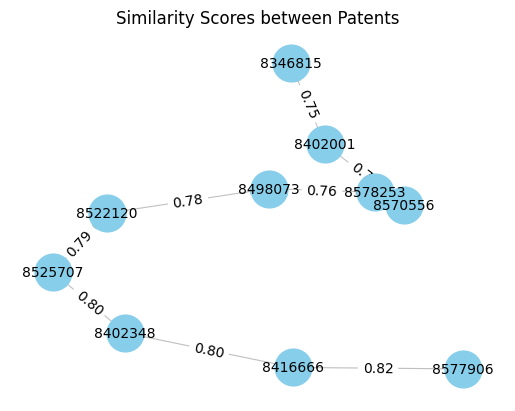

'\nAfter running this script, the plt.show() command will display the resulting graph.\nThe positions of nodes in the visualization are determined\nby the force-directed layout algorithm and will likely change each time you run\nthe script due to the random initialization of node\xa0positions.\n'

In [ ]:
"""
this plot is showing similarity score between two ids of the top 10 score of the output.
showing the avg similarity score between two consecutive ids from output dataframe
"""
#networkx library for Force directed layout.
#networkx for creating and manipulating graphs
import networkx as nx
import matplotlib.pyplot as plt


# This line initializes an empty directed graph (DiGraph) using the NetworkX library.
G = nx.DiGraph()

# Adding nodes and edges based on similarity scores
"""
This loop iterates over the top 10 records in k_similar_patents and adds nodes and edges to the graph
based on the patent information and similarity scores.Each node is labeled with information
about the patent, including its ID, CPC ID, and similarity score. Edges are added between consecutive patents
in the sorted list based on their similarity scores.
"""
for i in range(len(result_df)):
    patent_id = result_df.iloc[i]['id']
    cpc_id = result_df.iloc[i]['cpc_ids']
    similarity_score = result_df.iloc[i]['similarity_score']
    #plot to show final visuals
    G.add_node(patent_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # Connect nodes with directed edges based on similarity score
    if i > 0:
        previous_patent_id = result_df.iloc[i - 1]['id']
        G.add_edge(previous_patent_id, patent_id, weight=similarity_score)

# Draw the graph using a force-directed layout
"""
It generates positions of nodes using the force-directed layout algorithm (spring_layout)
provided by NetworkX. The pos variable now contains the 2D coordinates of each node.

"""
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
"""
These lines use the networkx drawing functions to visualize the nodes, edges, and labels
based on the generated layout (pos). Nodes are drawn with a size of 700, colored sky blue

"""
#These lines add labels to the edges, displaying their weights (similarity scores) on the graph.
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Similarity Scores between Patents")
plt.axis("off")
plt.show()
"""
After running this script, the plt.show() command will display the resulting graph.
The positions of nodes in the visualization are determined
by the force-directed layout algorithm and will likely change each time you run
the script due to the random initialization of node positions.
"""

1] Nodes are created for each patent using the patent_id as the node identifier. Edges are created from the "cpc_ids" node to each patent node with weights based on similarity scores.

2]In the first code snippet, nodes are created for each patent, and there is a special node "cpc_ids" from which edges originate.

3]The first code snippet represents a graph where patents are connected to a special "cpc_ids" node.

4]The first code snippet seems to focus on the relationship between a general "cpc_ids" category and individual patents.

**5]A Directed Acyclic Graph (DAG) is a graph structure that consists of nodes (vertices) and directed edges. In a DAG, edges have a direction, meaning they go from one node to another, and there are no cycles, which means you cannot traverse a sequence of edges and return to the starting node. In other words, you can't have a closed loop in a DAG.**


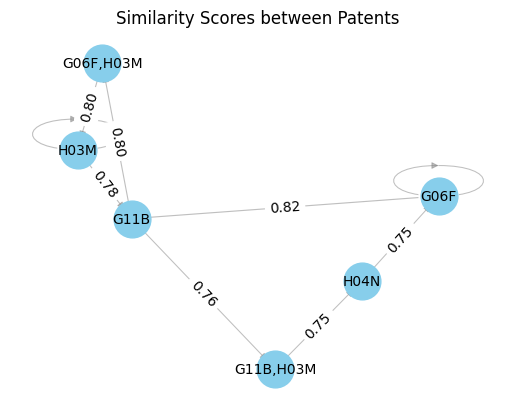

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(result_df)):
    patent_id = result_df.iloc[i]['id']
    cpc_id = result_df.iloc[i]['cpc_ids']
    similarity_score = result_df.iloc[i]['similarity_score']

    G.add_node(cpc_id, label=f"Patent {cpc_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")
    #creating a directed acyclic graph (DAG) where nodes represent patents and edges represent the
    #relationships between patents based on their similarity scores.

    # Connect nodes with directed edges based on similarity score
    if i > 0:
        previous_cpc_id = result_df.iloc[i - 1]['cpc_ids']
        G.add_edge(previous_cpc_id, cpc_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Similarity Scores between Patents")
plt.axis("off")
plt.show()

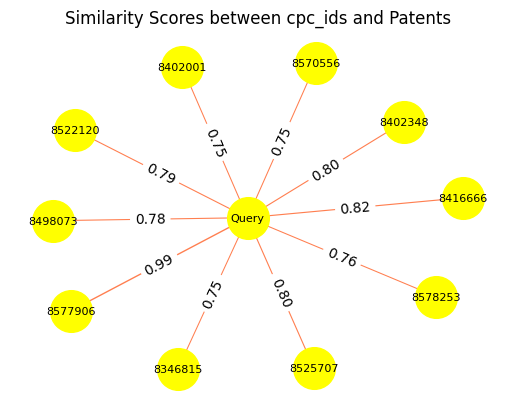

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(result_df)):
    patent_id = result_df.iloc[i]['id']
    cpc_id = result_df.iloc[i]['cpc_ids']
    similarity_score = result_df.iloc[i]['similarity_score']
    sentence = result_df.iloc[i]['text']

    G.add_node(patent_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # # Connect nodes with directed edges based on similarity score
    G.add_edge("Query",patent_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=900, node_color="yellow")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="coral", alpha=1)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



# Show the graph
plt.title("Similarity Scores between cpc_ids and Patents")
plt.axis("off")
plt.show()

1]Nodes are created for each CPC (Common Patent Classification) code using the cpc_id as the node identifier.
Edges are created between consecutive CPC nodes based on similarity scores.

2]In the second code snippet, nodes represent CPC codes, and edges connect consecutive CPC nodes.

3]The second code snippet represents a directed acyclic graph (DAG) where nodes represent CPC codes, and edges connect consecutive CPC codes based on similarity scores.

4]The second code snippet seems to focus on representing a sequence or hierarchy of CPC codes based on similarity scores between consecutive codes.

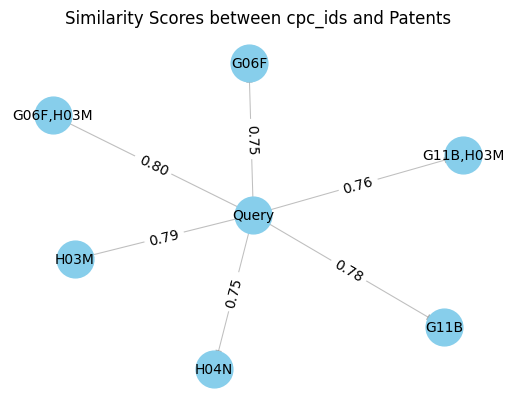

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(result_df)):
    patent_id = result_df.iloc[i]['id']
    cpc_id = result_df.iloc[i]['cpc_ids']
    similarity_score = result_df.iloc[i]['similarity_score']
    sentence = result_df.iloc[i]['text']

    G.add_node(cpc_id, label=f"Patent {cpc_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # # Connect nodes with directed edges based on similarity score
    G.add_edge("Query",cpc_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



# Show the graph
plt.title("Similarity Scores between cpc_ids and Patents")
plt.axis("off")
plt.show()

## **Pyviz implimentation**

In [ ]:
! pip install pyvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.9 MB/s eta 0:00:00


In [ ]:
! pip install pyvis --upgrade

In [ ]:
# Extracting necessary columns for visualization
data = result_df[['id', 'cpc_ids', 'similarity_score']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(data)):
    patent_id = data.iloc[i]['id']
    cpc_id = data.iloc[i]['cpc_ids']
    similarity_score = data.iloc[i]['similarity_score']

    G.add_node(cpc_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")
    G.add_edge("Query", cpc_id, value=similarity_score)

# Create a Pyvis network
pyvis_network = Network(notebook=True,cdn_resources='remote')
pyvis_network.from_nx(G)

# Save the Pyvis network as an HTML file
html_file_path = '/content/drive/MyDrive/petants/graph.html'
pyvis_network.show(html_file_path)

# Display the Pyvis network
pyvis_network.show(html_file_path)

# Display the web diagram in Colab
with open(html_file_path, 'r') as file:
    html_content = file.read()

HTML(html_content)

/content/drive/MyDrive/petants/graph.html
/content/drive/MyDrive/petants/graph.html


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
from IPython.display import HTML

# Assuming df_claim_cpc_result is your DataFrame with columns "id", "cpc_ids", "similarity_score", "text"
# k_similar_patents = df_claim_cpc_result.nlargest(10, ['similarity_score'])

# Extracting necessary columns for visualization
data = result_df[['id', 'cpc_ids', 'similarity_score']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(data)):
    patent_id = data.iloc[i]['id']
    cpc_id = f"{patent_id}_{data.iloc[i]['cpc_ids']}"
    similarity_score = data.iloc[i]['similarity_score']

    G.add_node(cpc_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")
    G.add_edge("Query", cpc_id, value=similarity_score)

# Create a Pyvis network
pyvis_network = Network(notebook=True,cdn_resources='remote')
pyvis_network.from_nx(G)

# Save the Pyvis network as an HTML file
html_file_path = '/content/drive/MyDrive/petants/graph.html'
pyvis_network.show(html_file_path)

# Display the Pyvis network
pyvis_network.show(html_file_path)

# Display the web diagram in Colab
with open(html_file_path, 'r') as file:
    html_content = file.read()

HTML(html_content)

/content/drive/MyDrive/petants/graph.html
/content/drive/MyDrive/petants/graph.html


In [ ]:
data = result_df[['id', 'cpc_ids', 'similarity_score']]
data


,id,cpc_ids,similarity_score
500,8577906,G06F,0.987955
34376,8416666,G11B,0.822428
14873,8402348,"G06F,H03M",0.804161
13731,8525707,H03M,0.801636
39009,8522120,H03M,0.785829
32259,8498073,G11B,0.784012
1825,8578253,"G11B,H03M",0.758183
40256,8570556,H04N,0.754805
986,8402001,G06F,0.750503
36379,8346815,G06F,0.748408


## **Evaluaton Of Sentance Embeding**

In [ ]:
from scipy.stats import pearsonr
text=patent_dataset["text"][1217]
text
# Load benchmark dataset (replace 'your_benchmark_dataset.csv' with the actual file)
# benchmark_df = pd.read_csv('/content/result_df_benchmark1')
# text1="An anti-fret assembly for a turbine engine, the assembly comprising an elongated liner and an anti-translation pin, the liner having first and second walls connected by a base to provide a generally U-shaped channel, the liner having an outer surface adapted to lie against a first component and an inner surface adapted to lie against a second component, at least the first wall being provided with a notch for receipt of the anti-translation pin, wherein the anti-translation pin extends between the first and second walls and protrudes through the notch in the first wall and engages at least one anti-translation notch located in the first component."
query_embedding = model.encode(text)
# Extract pairs of texts and ground truth similarity scores
benchmark_texts =query_embedding
ground_truth_scores =result_df['similarity_score']

# Encode benchmark texts using the model
# benchmark_embeddings = model.encode(benchmark_texts)
model_similarity_scores = util.pytorch_cos_sim(benchmark_texts, sentence_embeddings)[0]
# Compute model similarity scores
# model_similarity_scores = util.pytorch_cos_sim(query_embedding[:, 0, :], query_embedding[:, 1, :])

# Evaluate model performance using Pearson correlation
pearson_corr, _ = pearsonr(model_similarity_scores, ground_truth_scores)
print(f"Pearson Correlation: {pearson_corr:.4f}")

Pearson Correlation: 0.0025


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ground_truth_scores, model_similarity_scores)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0135


## MRR trail

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_mrr(query_embeddings, sentence_embeddings, relevance_threshold=1):
    mrr_sum = 0.0
    num_queries = 1

    for i in range(num_queries):
        query_embedding = np.array(query_embeddings[i]).reshape(1, -1)  # Ensure query_embedding is 2D

        similarities = [cosine_similarity(query_embedding, np.array(candidate_embedding).reshape(1, -1))[0, 0] for candidate_embedding in sentence_embeddings]
        ranked_indices = sorted(range(len(similarities)), key=lambda k: similarities[k], reverse=True)

        # Find the rank of the first relevant sentence
        rank_of_first_relevant = next((rank + 1 for rank, idx in enumerate(ranked_indices) if similarities[idx] > relevance_threshold), None)

        # If no relevant sentence is found, set rank to the maximum rank + 1
        rank = rank_of_first_relevant if rank_of_first_relevant is not None else len(similarities) + 1

        # Compute reciprocal rank
        reciprocal_rank = 1 / rank
        mrr_sum += reciprocal_rank

    # Compute average MRR
    mrr = mrr_sum / num_queries
    return mrr

# Example usage
my_query_embeddings = [query_embedding]
query_embeddings = np.array(my_query_embeddings).reshape(1, -1)

relevance_threshold = 0.99

mrr = compute_mrr(query_embeddings, sentence_embeddings, relevance_threshold)
print(f"MRR-score: {mrr:.4f}")

MRR-score: 1.0000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_mrr(query_embeddings, sentence_embeddings, relevance_threshold=1):
    mrr_sum = 0.0
    num_queries = len(query_embeddings)

    for i in range(num_queries):
        query_embedding = np.array(query_embeddings[i]).reshape(1, -1)  # Ensure query_embedding is 2D

        similarities = [cosine_similarity(query_embedding, np.array(candidate_embedding).reshape(1, -1))[0, 0] for candidate_embedding in sentence_embeddings]
        relevant_indices = [idx for idx, similarity in enumerate(similarities) if similarity > relevance_threshold]

        if not relevant_indices:
            # If no relevant sentence is found, set rank to the maximum rank + 1
            rank = len(similarities) + 1
        else:
            # Find the rank of the first relevant sentence
            rank = min(relevant_indices) + 1

        # Compute reciprocal rank
        reciprocal_rank = 1 / rank
        mrr_sum += reciprocal_rank

    # Compute average MRR
    mrr = mrr_sum / num_queries
    return mrr

# Example usage
my_query_embeddings = [query_embedding]
query_embeddings = np.array(my_query_embeddings).reshape(1, -1)

relevance_threshold = 0.5

mrr = compute_mrr(query_embeddings, sentence_embeddings, relevance_threshold)
print(f"MRR-score: {mrr:.4f}")


MRR-score: 0.0588
